### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

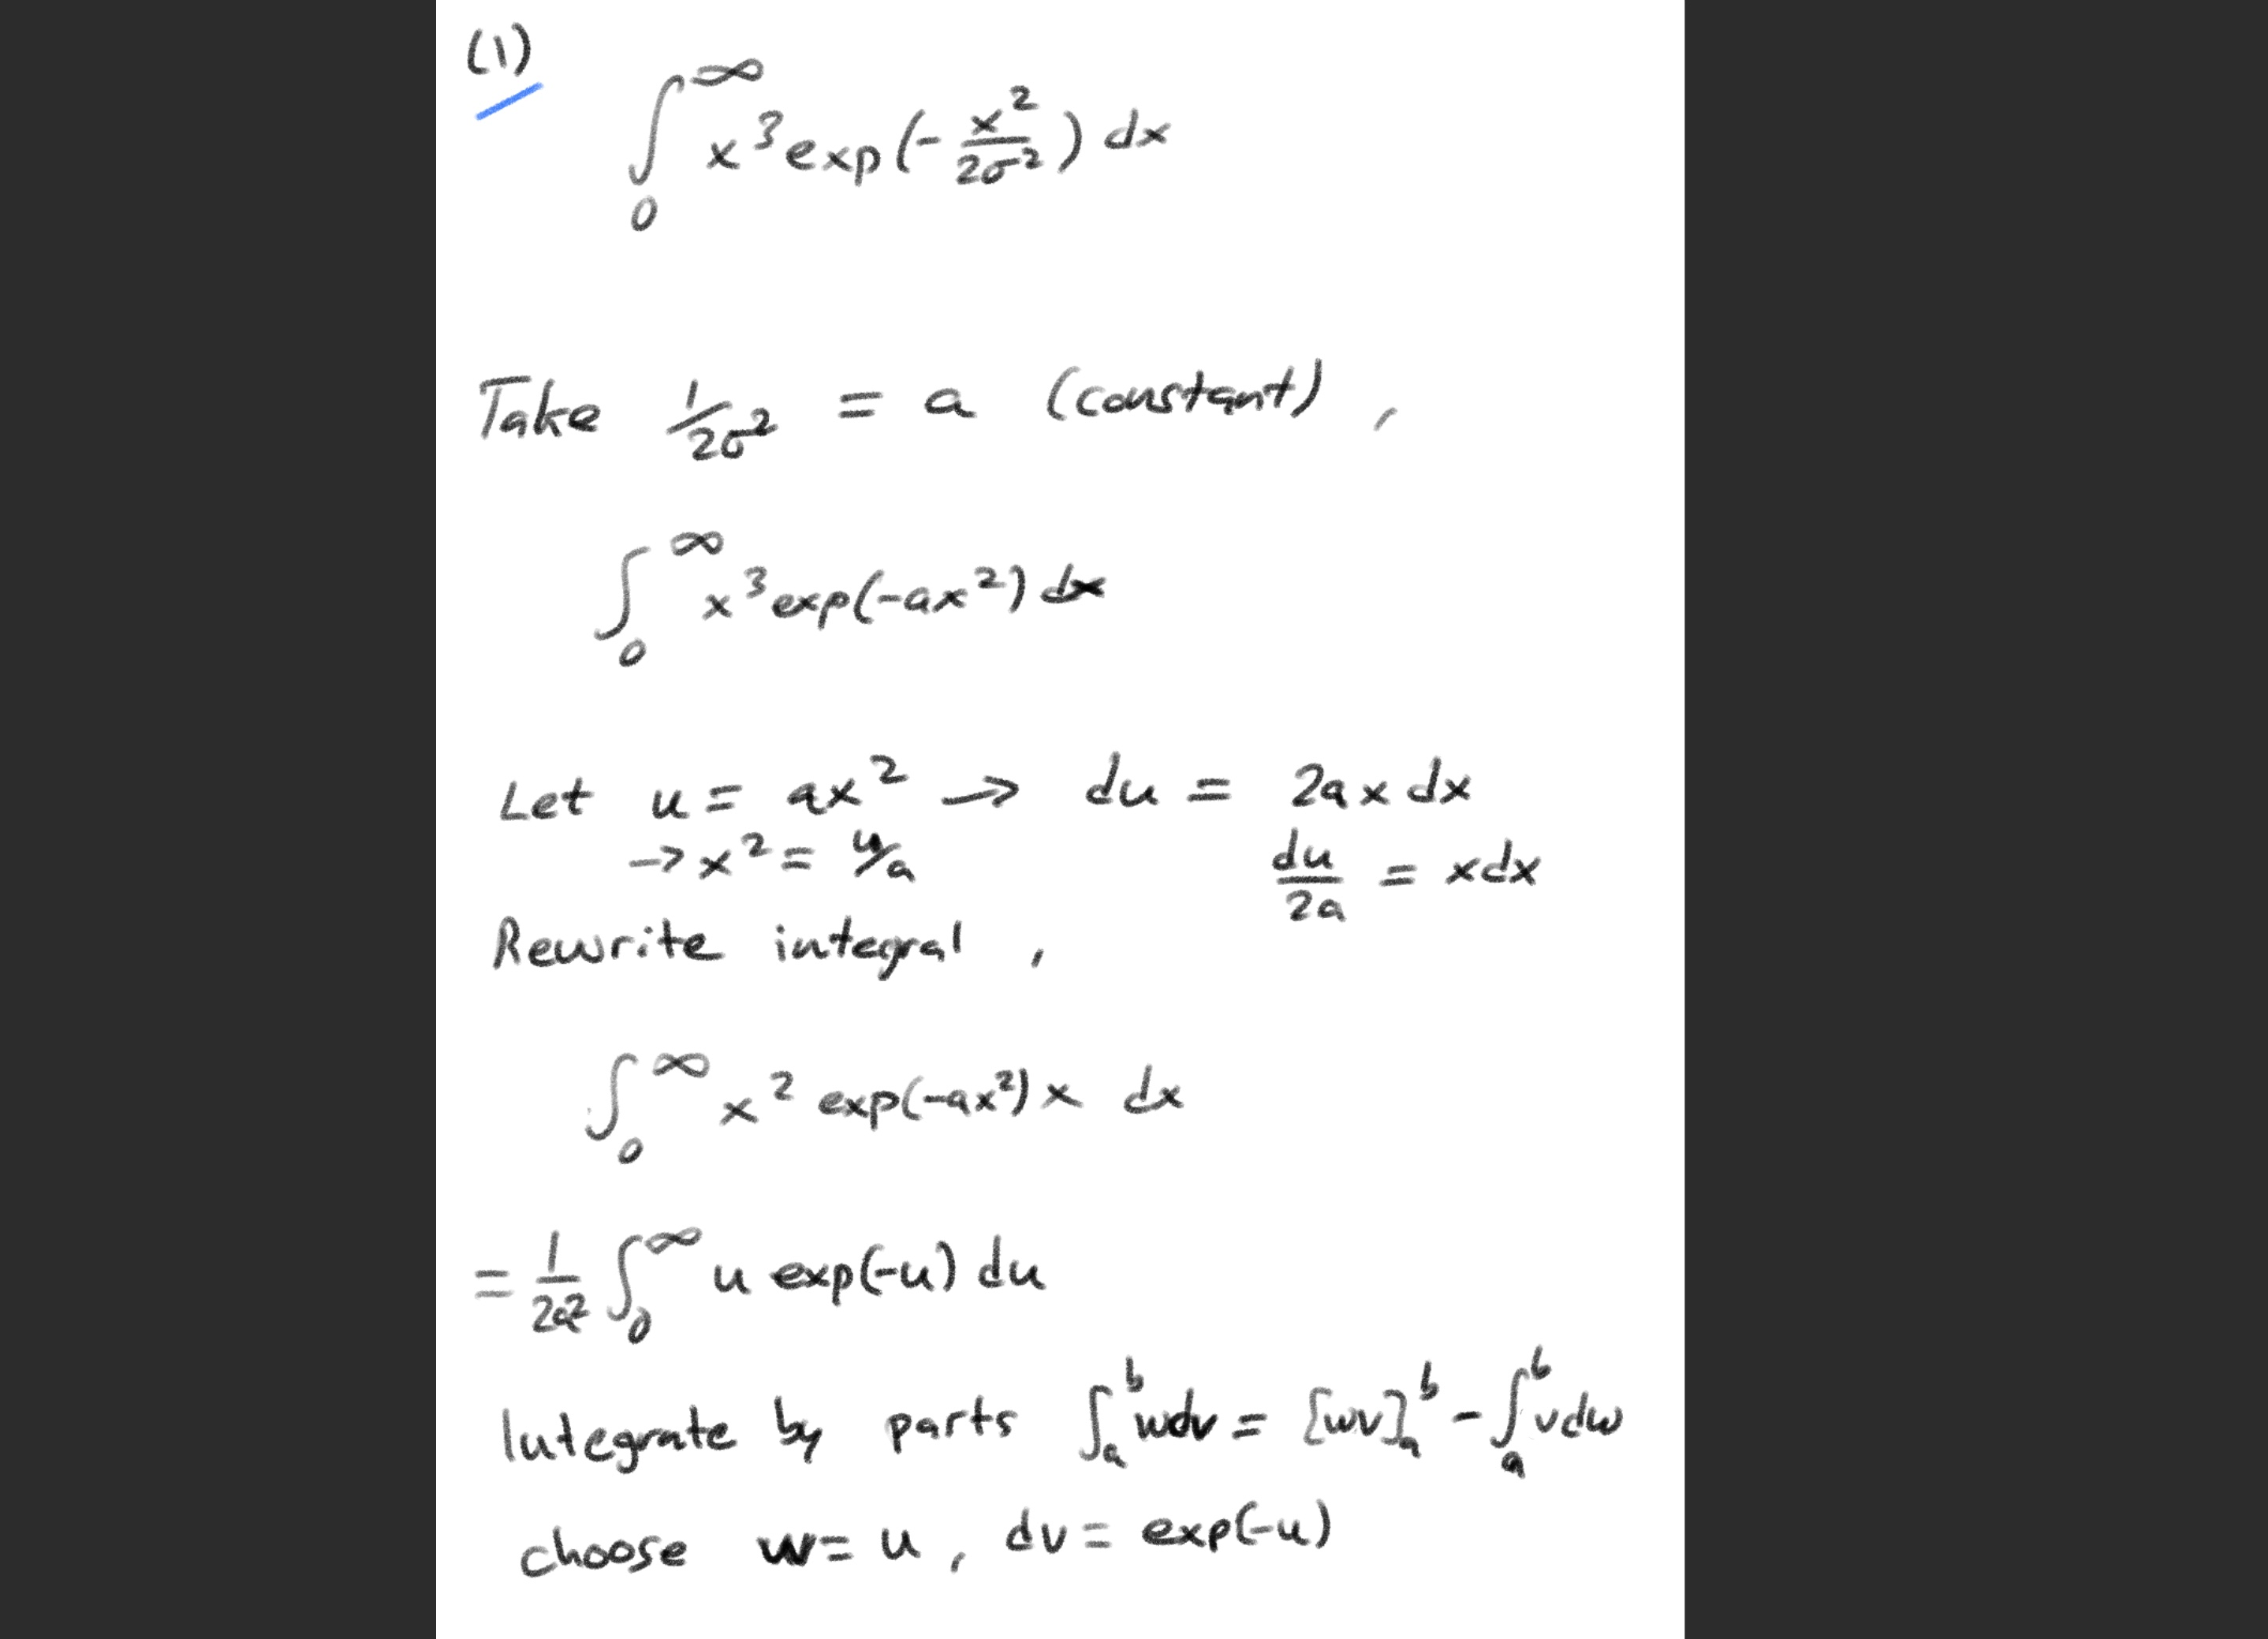

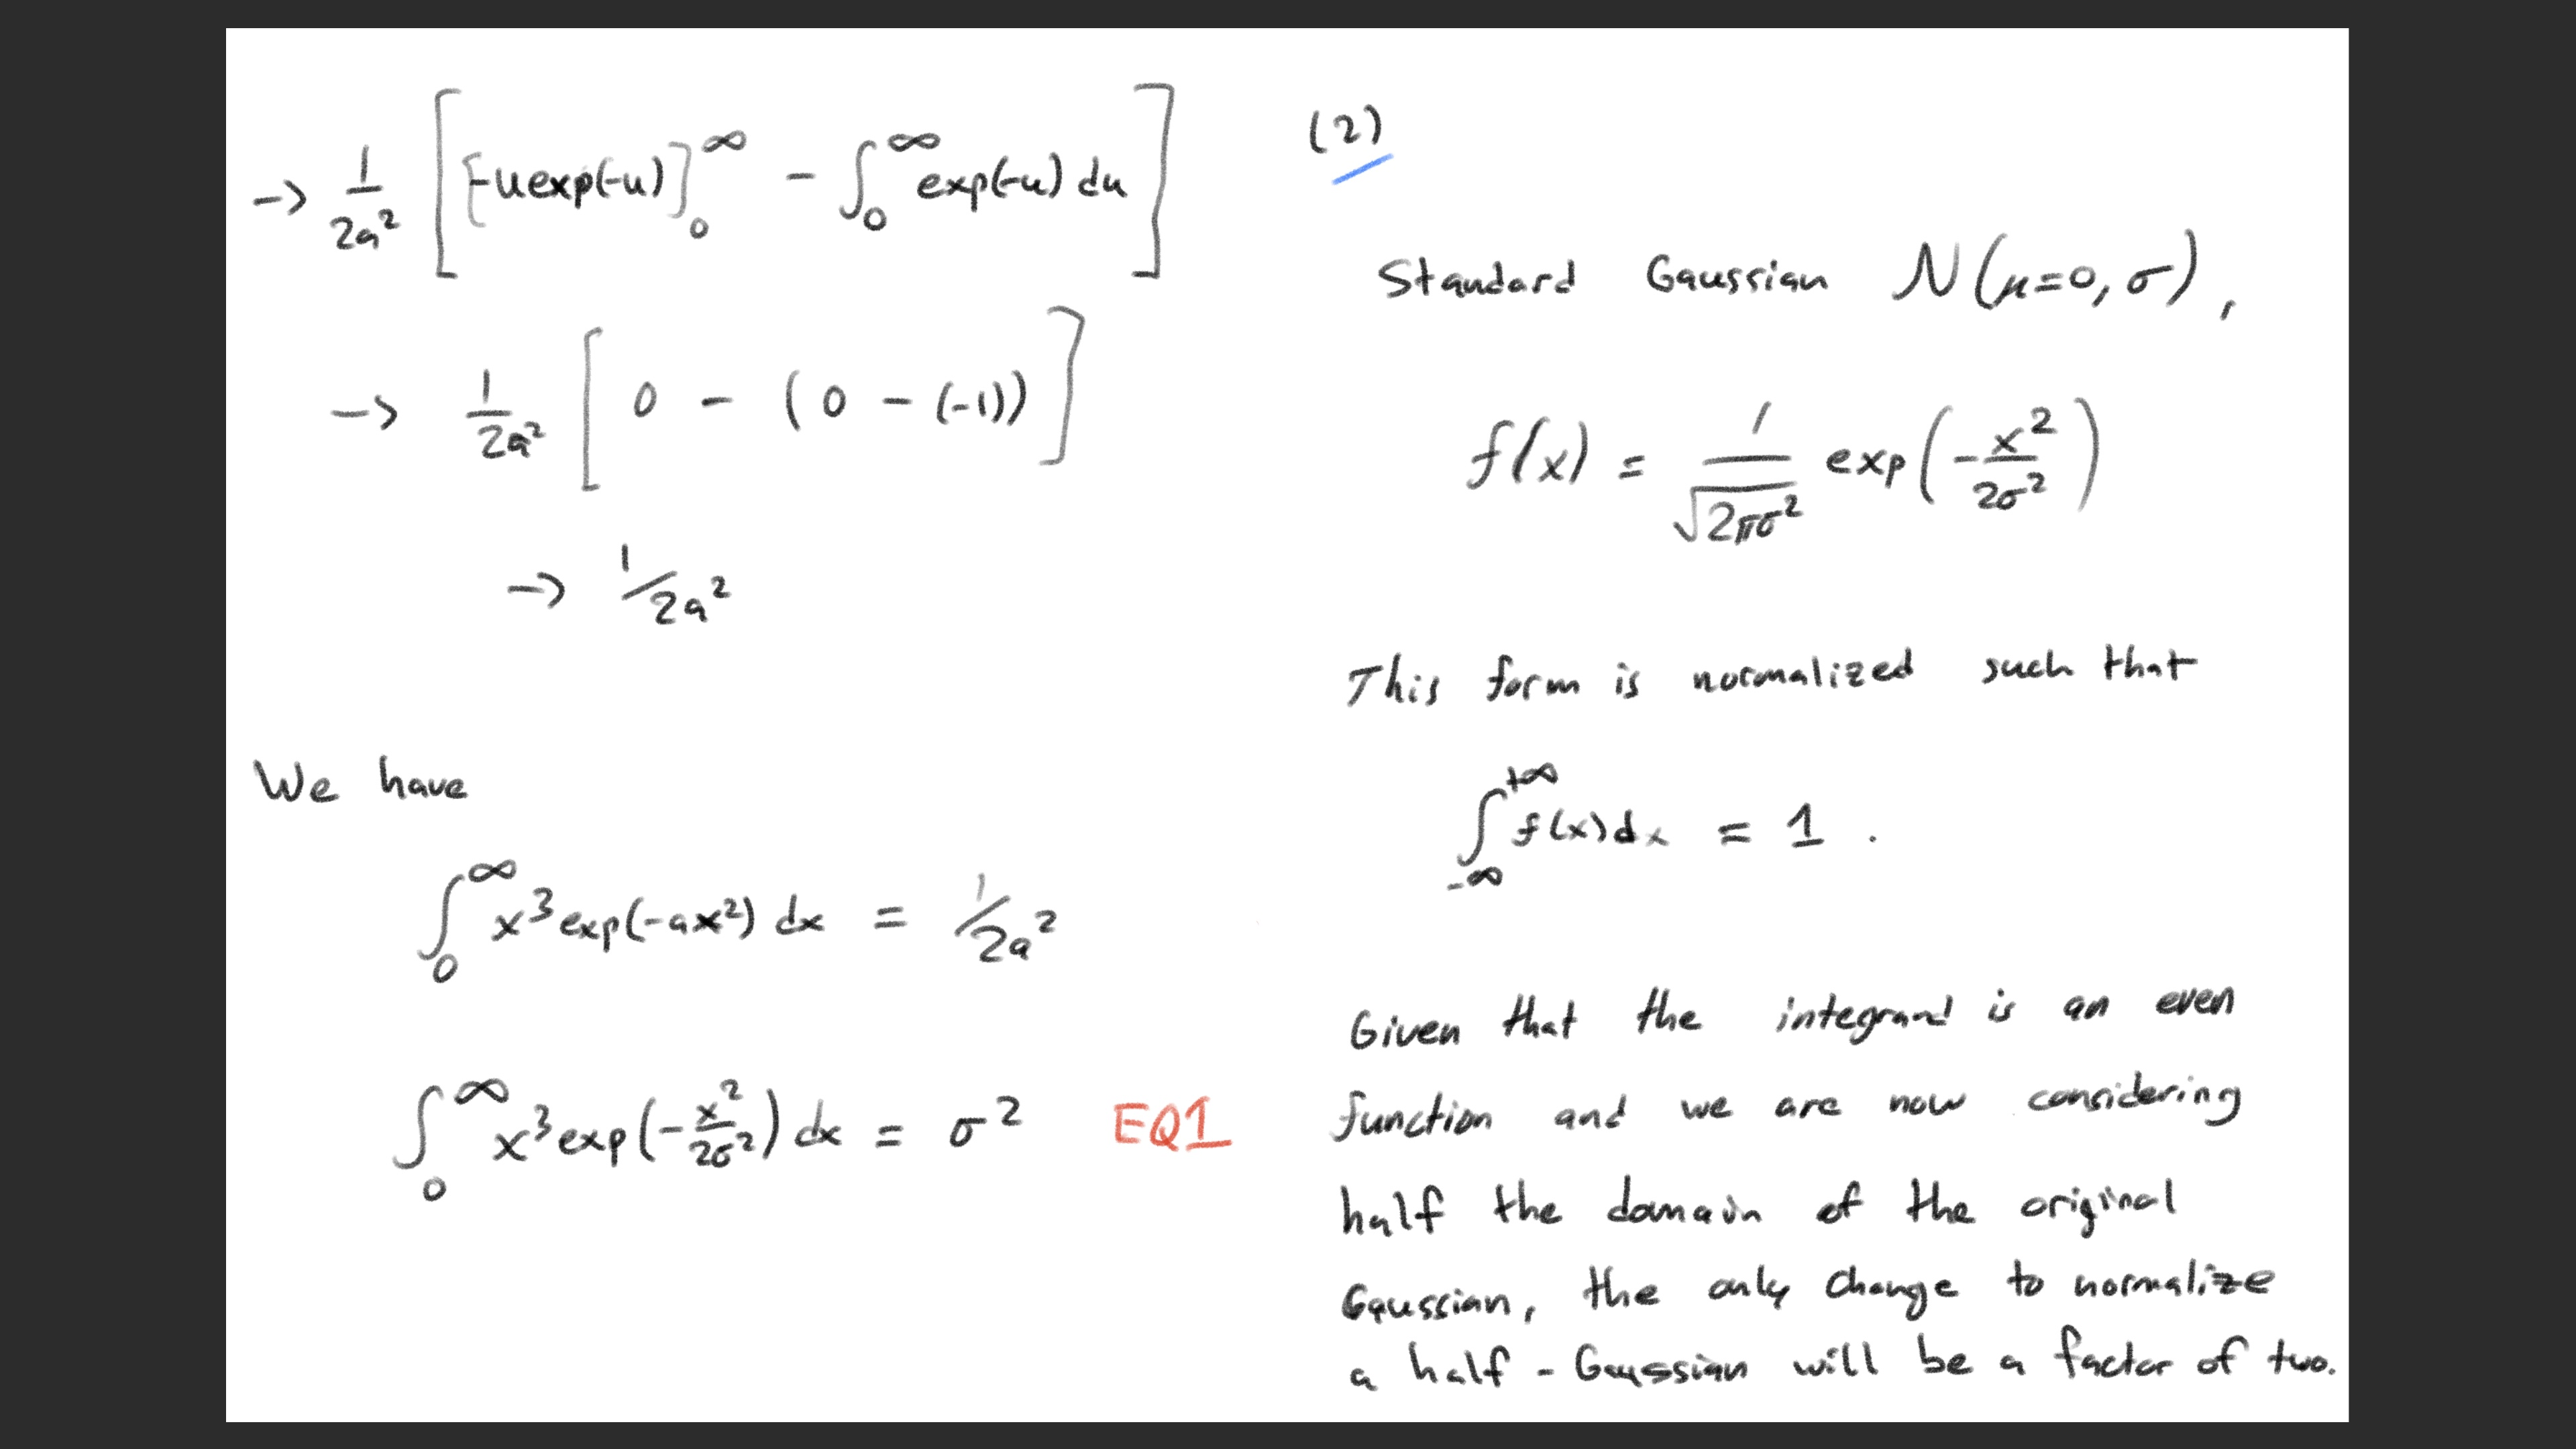

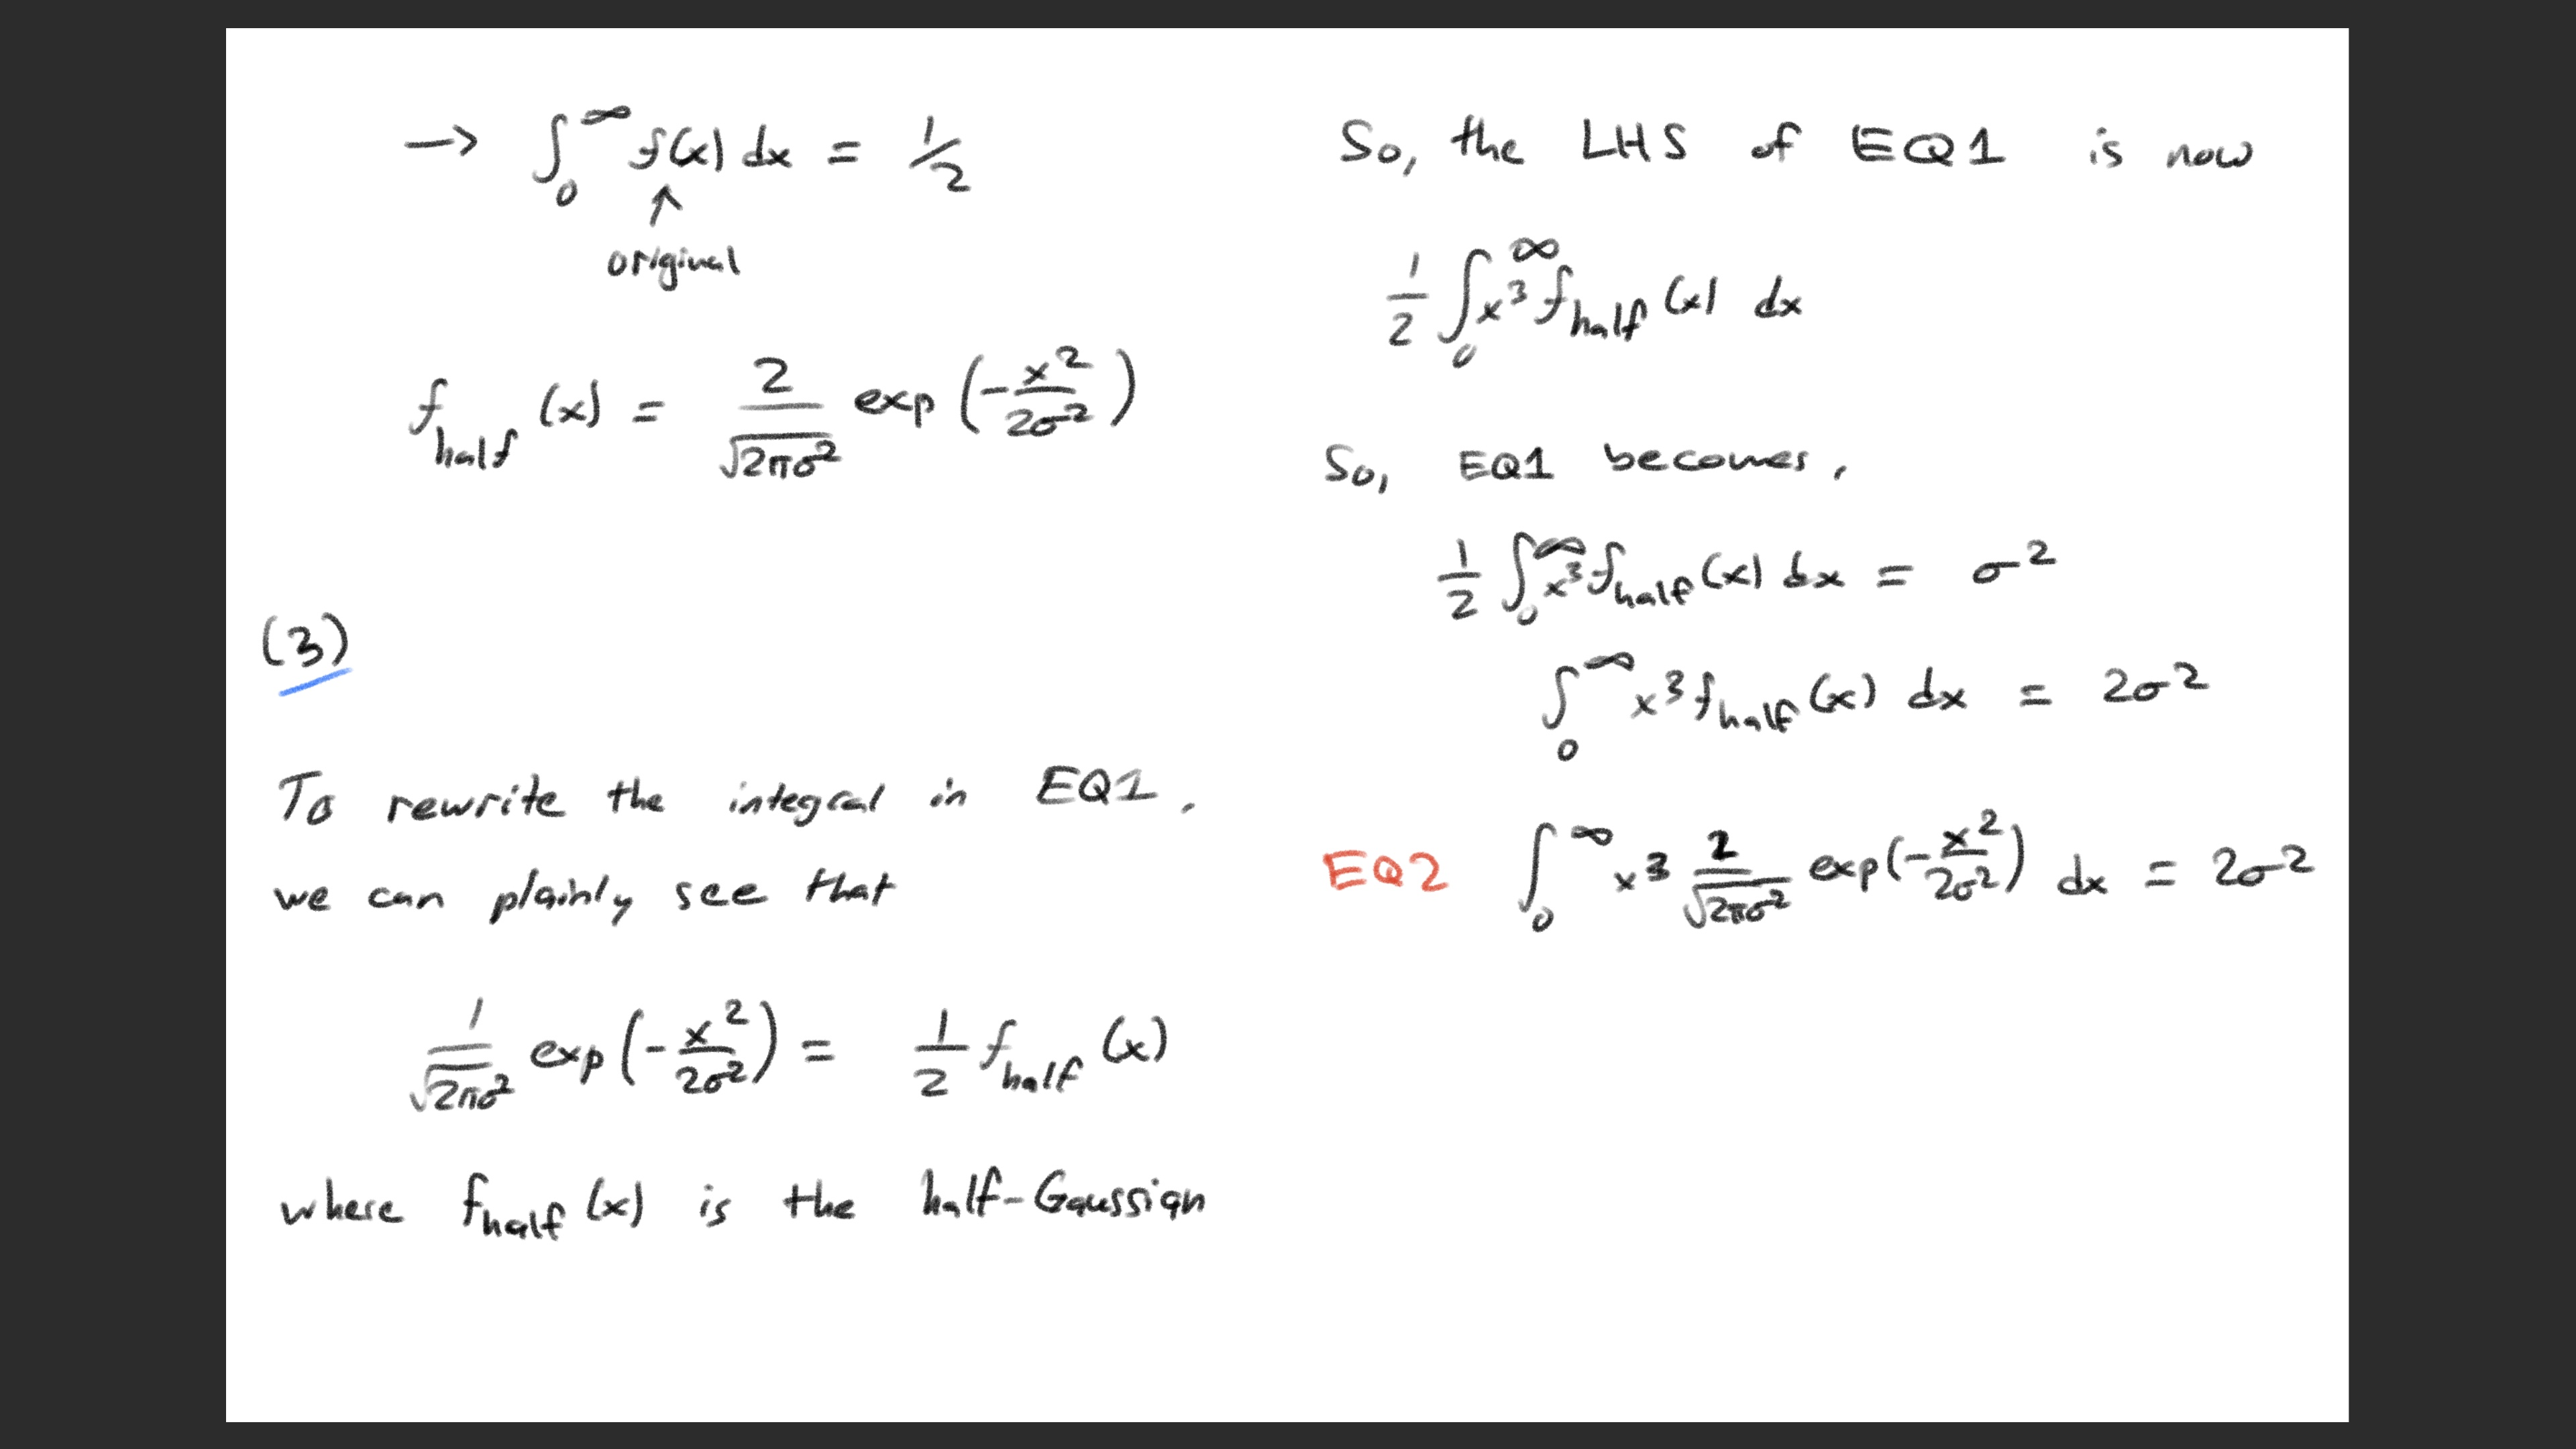

I tried for a long time after completing problems 2 and 3, to get (4) of problem 1 to work. Unfortunately, I could not figure it out. I am fairly confident in the analytic derivation, but clearly something is not quite logically adding up. I hope I can get partial points for the different methods I tried here.

In [98]:

import numpy as np

mu=0
sigma = 2
N = 10000

Gauss = norm(loc=0,scale=sigma)
norm_samples = Gauss.rvs(N) # drawing random samples from normal distribution
pos_norm_samples = norm_samples[norm_samples > 0] # only samples that are positive are left over because of this Boolean mask, the fact we are only taking sample values from the positive domain is reflecting our half Gaussian rewrite of the integral


def f(x): # defining a function for a piece of the integral
    return x**3

#I don't think we need to multiply by the pieces of the normalization factor that overlap with a standard gaussian normalization, since the random draws already account for that

normalization_half_gauss = 2 / (np.sqrt(2*np.pi*(sigma**2))) # normalization for the rewritten equation from (3)
gaussian_part = np.exp(-(pos_norm_samples**2) / (2*(sigma**2)))

analytic_result = 2*(sigma**2)
mc_integral = 2 * np.mean(f(pos_norm_samples)) 


print("The Monte Carlo integration yields: %.2f" % mc_integral)
print("The analytic derivation yields: %.2f" % analytic_result)


# this method below is based on a forum I checked on stack overflow, unfortunately it still is not quite working the way I need it to
def f(x):
    return x**3
# using a loop structure to evaluate the contribution to the integral one sample at a time, accounting for the fact we only want to evaluate positively valued samples
def monte_carlo(samples_size,mu,sigma):
    mc_list = []
    for i in range(samples_size):
        x = np.random.normal(loc=0,scale=sigma)
        # conditionals to remove any negatively valued random draws
        if x>0:
            mc_list.append(f(x))
        else:
            continue
    return np.mean(mc_list)

monte_carlo_result = monte_carlo(N,mu,sigma)
print(monte_carlo_result)

# I know I can use np.arange(batch number) in a for loop structure where I change the random draws from sample size N = 10^5, 10^4, etc...


The Monte Carlo integration yields: 26.52
The analytic derivation yields: 8.00
13.654917172892718


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

[108.88446767 108.47604934 127.27857193 103.15468    101.95480405
  90.80281965 137.94197025  91.10903735 111.65848135  75.87258646]
0.00010281859975274035
Fraction of people above 150 IQ: 0.0004188919494503285
A one-in-a-million IQ is: 171.3013646322563


<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_27419/3342890652.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel("p(x|$\mu$,$\sigma$)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_27419/3342890652.py:38: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel("CDF(x|$\mu$,$\sigma$)")


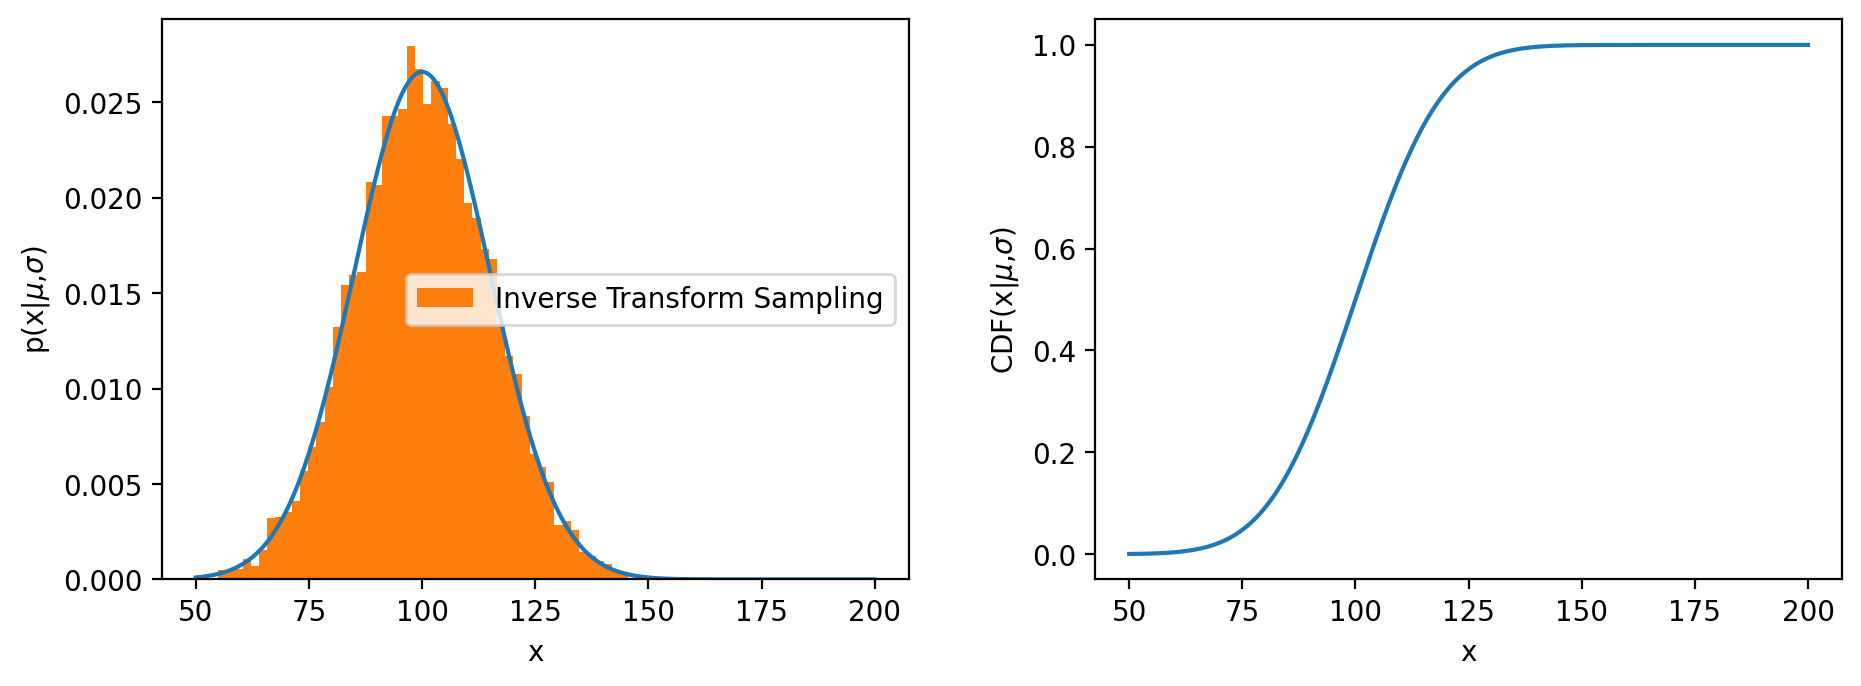

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
# magic command specific to use in IPython and Jupyter Notebook, this one ensures we can make plots with matplotlib directly inside notebook instead of separate window
%config InlineBackend.figure_format='retina' 
#ensures high res displays (like the mac I am using) do not show pixelated plots

# PROBLEM 1 START
import scipy.stats
from scipy.stats import norm

mu=100
sigma=15

xgrid = np.linspace(50,200,1000) # Array to sample the space 
distG = norm(loc=mu, scale=sigma)

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax1 = fig.add_subplot(121) # left hand subplot
ax1.plot(xgrid,distG.pdf(xgrid))
ax1.set_xlabel("x")
ax1.set_ylabel("p(x|$\mu$,$\sigma$)")

# PROBLEM 1 END

# PROBLEM 2 START

random_draws = distG.rvs(10) # random draws of normal distribution (10)
print(random_draws)
print(distG.pdf(150)) # pdf value at x=150 IQ

ax2 = fig.add_subplot(122) 
ax2.plot(xgrid,distG.cdf(xgrid))
ax2.set_xlabel("x")
ax2.set_ylabel("CDF(x|$\mu$,$\sigma$)")

# can increase 10^5 samples from uniform distribution to improve inverse sampling result
sample_uniform = np.random.uniform(0.001,0.999,10000) # getting a bunch of random fractional values from a uniform distribution. These fractions indicate how much of our distG pdf we want included in a quantile function calculation (ppf), the fraction is the percentile of distG

random_samples = distG.ppf(sample_uniform) # getting an array of values for the x (IQ) corresponding to given percentiles fed into the ppf function (fractions from above)

ax1.hist(random_samples,bins=50,density=True,label="Inverse Transform Sampling") # creating sampled histogram and visualizing the discrepancy compared to original distribution
ax1.legend()

# PROBLEM 2 END

# PROBLEM 3 START

lower = distG.cdf(150.1) # lower bound can be adjusted, calculating complete sum of pdf up to 150.1 IQ
upper = distG.cdf(distG.ppf(1)) # using ppf function at 100 percentile to get the x (we know it is roughly 200 IQ, I just thought this would be a nicer, general way to code this line), and then computing complete cdf sum
fraction_above_150 = upper-lower # fraction by getting difference in pdfs
print("Fraction of people above 150 IQ:",fraction_above_150) # this result can be checked by computing the z score and doing 1 - z-score

# PROBLEM 3 END

# PROBLEM 4 START

one_in_a_million_iq = distG.ppf(1-0.000001) # using the ppf function to get the IQ corresponding to the 99.9999th percentile
print("A one-in-a-million IQ is:", one_in_a_million_iq)

# PROBLEM 4 END


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

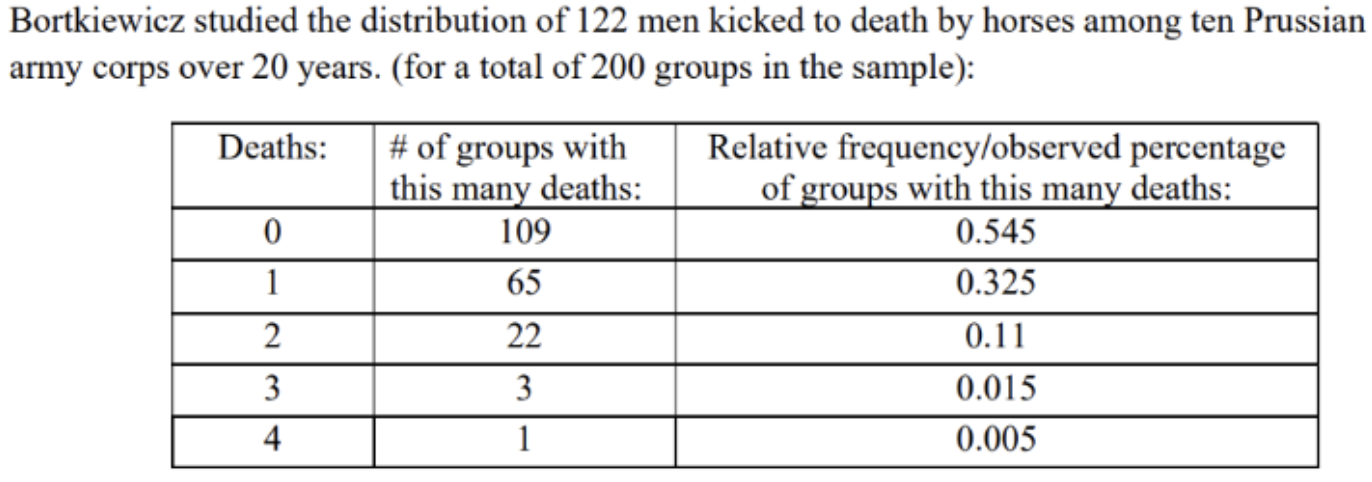

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

The mean of our model is: 0.415
The variance of our model is: 0.415
The skewness of our model is: 1.5523010514126658
The kurtosis of our model is: 2.4096385542168677


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_27419/2724597495.py:15: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("p(k|$\mu$)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_27419/2724597495.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax.scatter(deaths_arr,first_guess.pmf(deaths_arr),label="$\mu$ = 2 (Guess)",color='g',marker="*") # accessing probability mass function property of poisson object to create plot
/var/folders/5y/r0thn5qs43

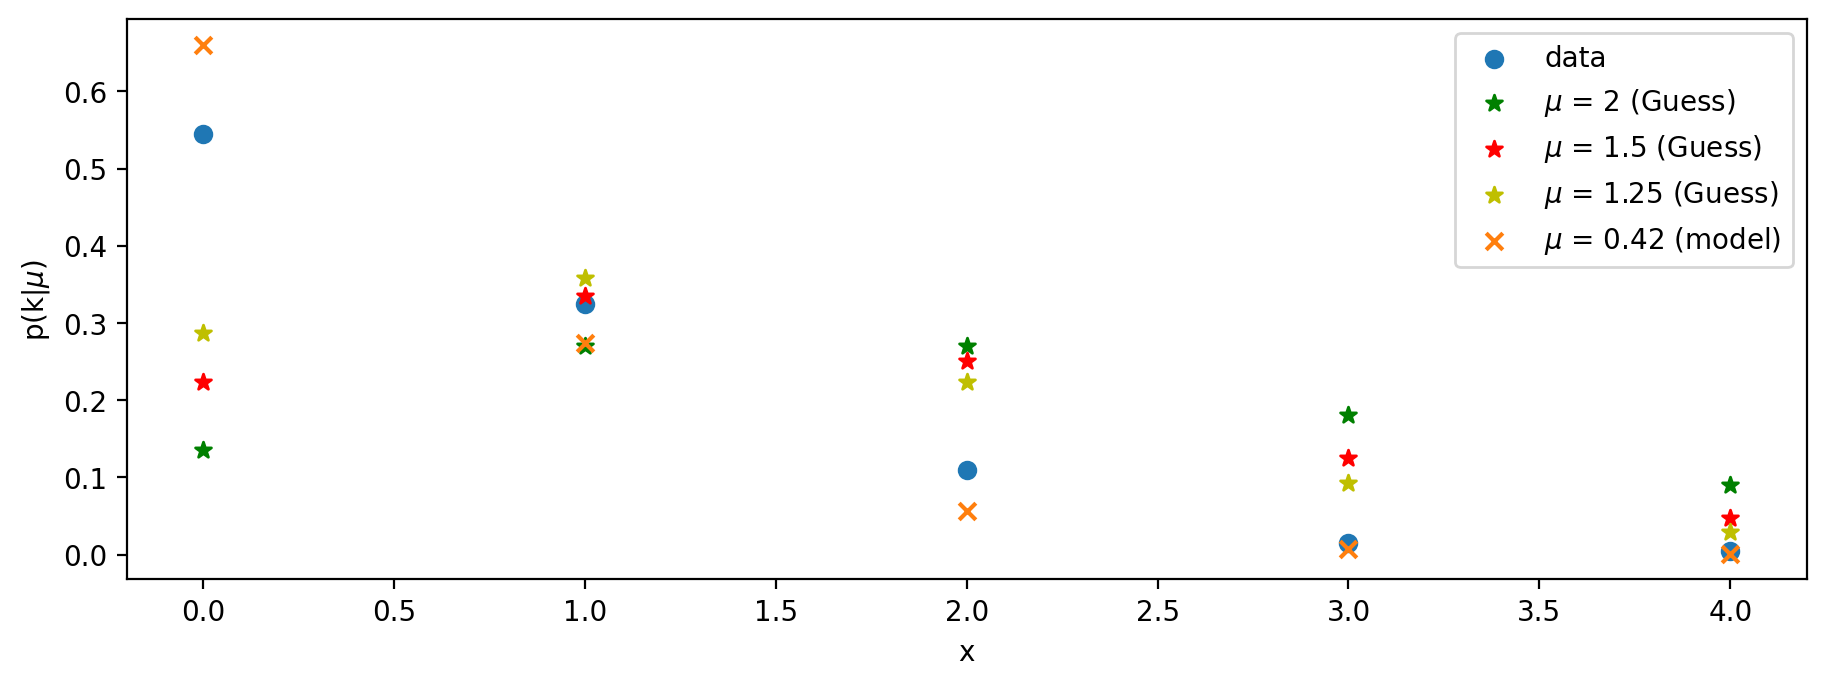

In [65]:
from scipy.stats import poisson

#PROBLEM 1

deaths_arr = [0,1,2,3,4] #x (number of events k is number of deaths in our case, specified by this array)
freq_arr = [0.545,0.325,0.11,0.015,0.005] #y

fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax = fig.add_subplot(111) # left hand subplot
ax.scatter(deaths_arr,freq_arr,label="data") # discrete distribution, so we use a scatter plot
ax.set_xlabel("x")
ax.set_ylabel("p(k|$\mu$)")

#PROBLEM 2

first_guess = poisson(mu=2) # defining different poisson functions based on mean value (guess based on spread in data for number of deaths and their relative frequency)
second_guess = poisson(mu=1.5)
third_guess = poisson(mu=1.25)

ax.scatter(deaths_arr,first_guess.pmf(deaths_arr),label="$\mu$ = 2 (Guess)",color='g',marker="*") # accessing probability mass function property of poisson object to create plot
ax.scatter(deaths_arr,second_guess.pmf(deaths_arr),label="$\mu$ = 1.5 (Guess)",color='r',marker="*")
ax.scatter(deaths_arr,third_guess.pmf(deaths_arr),label="$\mu$ = 1.25 (Guess)",color='y',marker="*")

#PROBLEM 3

# this next block of code is all necessarily split into steps because of dealing with python lists instead of numpy arrays that have easier element wise operations. I will use np.arrays next time when convenient
relative_groups = [109,65,22,3,1] # number of groups in second column of data
deaths_prop_groups = [a*b for a,b in zip(freq_arr,relative_groups)] # element wise multiplication weighing number of groups by relative frequency
weighted_mean_numerator = sum(deaths_prop_groups) # summing over list to get numerator of weighted mean

weighted_mean = weighted_mean_numerator / 200 # 200 total groups in the denominator

model = poisson(weighted_mean) # our deduced mean
mean, var, skew, kurt = poisson.stats(weighted_mean,moments='mvsk') # this macro easily allows us to compute the descriptive statistics for a given Poisson distribution
print("The mean of our model is:",mean)
print("The variance of our model is:",var)
print("The skewness of our model is:",skew)
print("The kurtosis of our model is:",kurt)


#PROBLEM 4

label_model = "$\mu$ = %.2f (model)" % round(mean,2) # format modifier to print result of model mean on plot
ax.scatter(deaths_arr,model.pmf(deaths_arr),label=label_model,marker="x")

ax.legend()


